# 1. Soft K-Means

In [4]:
import numpy as np
import matplotlib.pyplot as plt


## Create random data samples

In [2]:
def get_simple_data():
    # assume 3 means
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 # number of samples
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1 #np.random.randn : random in Gaussian PDF (Normal) 
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3
    return X


## Functions

In [6]:
#Calculate distance (d)
#2
def d(u, v):
    diff = u - v
    return diff.dot(diff)

#3
def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        # method 1
        # for n in range(len(X)):
        #     cost += R[n,k]*d(M[k], X[n])

        # method 2
        diff = X - M[k]
        sq_distances = (diff * diff).sum(axis=1)
        cost += (R[:,k] * sq_distances).sum()
    return cost

#1
def plot_k_means(X, K, max_iter = 20, beta = 1.0, show_plots=False):
    N, D = X.shape
    # R = np.zeros((N, K))
    exponents = np.empty((N, K))

    # initialize M to random
    initial_centers = np.random.choice(N, K, replace=False)
    M = X[initial_centers]

    costs = []
    k = 0
    for i in range(max_iter):
        k += 1
        
        # step 1: determine assignments / resposibilities
        # is this inefficient?
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*d(M[k], X[n]))
        R = exponents / exponents.sum(axis=1, keepdims=True)


        # step 2: recalculate means
        # decent vectorization
        # for k in range(K):
        #     M[k] = R[:,k].dot(X) / R[:,k].sum()
        # oldM = M

        # full vectorization
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
        # print("diff M:", np.abs(M - oldM).sum())

        c = cost(X, R, M)
        costs.append(c)
        if i > 0:
            if np.abs(costs[-1] - costs[-2]) < 1e-5:
                break

        if len(costs) > 1:
            if costs[-1] > costs[-2]:
                pass
                # print("cost increased!")
                # print("M:", M)
                # print("R.min:", R.min(), "R.max:", R.max())

    if show_plots:
        fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6,8))
        axes[0].plot(costs)
        axes[0].set_title("Costs")

        random_colors = np.random.random((K, 3))
        colors = R.dot(random_colors)
        axes[1].scatter(X[:,0], X[:,1], c=colors)

    print("Final cost", costs[-1])
    
    return M, R

            
        

Final cost 1827.4062027986056


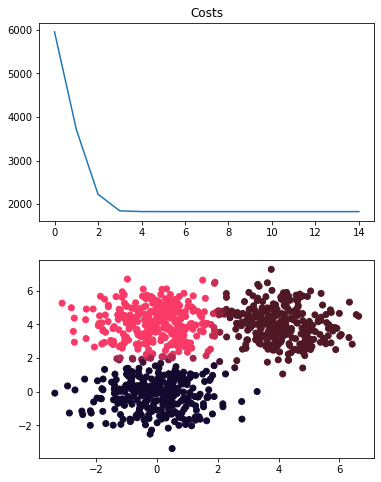

In [11]:
X = get_simple_data()
K = 3 # luckily, we already know this
_ , _ = plot_k_means(X, K, beta=1.0, show_plots=True)


Final cost 1697.3230252461226


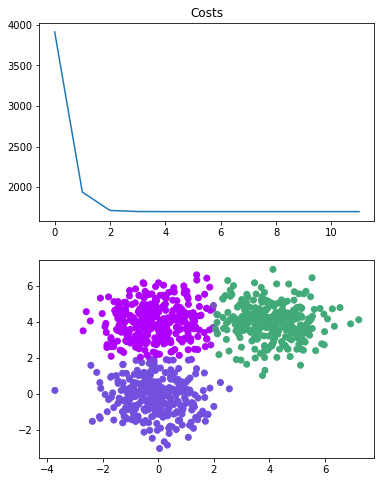

In [14]:

K = 3 # luckily, we already know this
plot_k_means(X, K, beta=3.0, show_plots=True)



Final cost 1695.9703790976719


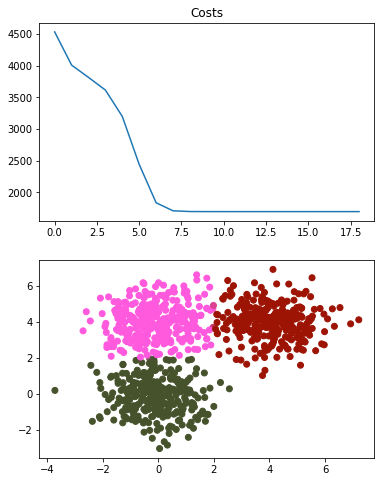

In [15]:
   
K = 3 # luckily, we already know this
plot_k_means(X, K, beta=10.0, show_plots=True)

Final cost 1366.9124802783472


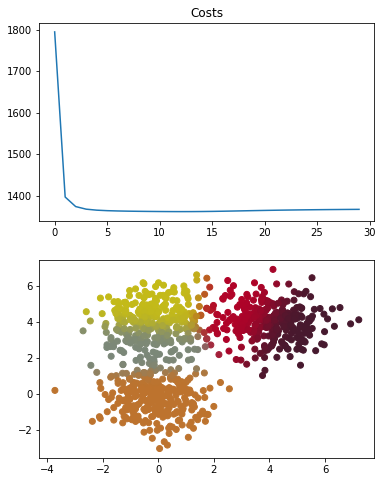

In [16]:
 
K = 5 # what happens if we choose a "bad" K?
plot_k_means(X, K, max_iter=30, show_plots=True)



Final cost 2045.452161039202


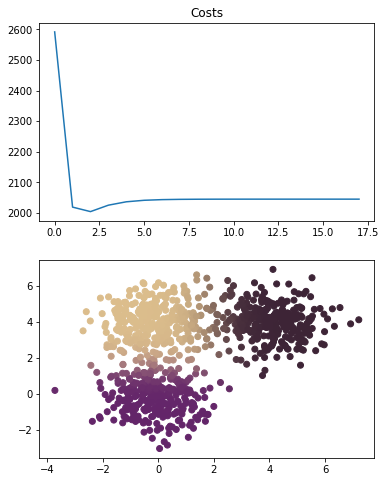

In [17]:

K = 5 # what happens if we change beta?
plot_k_means(X, K, max_iter=30, beta=0.3, show_plots=True)

In [ ]:
# อย่าลืมนำเอาfunction ไปรวมไว้ในไฟล์ k_means_functions.py